In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [7]:
data = pd.read_csv('data/imports.csv', header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,9.238383,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,3.298437,3.237313,10.145125,95.875000,5116.250000,26.506250,32.068750
std,0.441229,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,0.267348,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948
min,8.540500,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000
25%,8.907025,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000
50%,9.123000,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000
75%,9.585800,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000
max,10.465000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000


In [10]:
X = data.values[:, 1:]
y = data.values[:, 0]

X = sm.add_constant(X)
X

array([[1.000e+00, 9.980e+01, 1.766e+02, ..., 5.500e+03, 2.400e+01,
        3.000e+01],
       [1.000e+00, 9.940e+01, 1.766e+02, ..., 5.500e+03, 1.800e+01,
        2.200e+01],
       [1.000e+00, 1.058e+02, 1.927e+02, ..., 5.500e+03, 1.900e+01,
        2.500e+01],
       ...,
       [1.000e+00, 1.091e+02, 1.888e+02, ..., 5.500e+03, 1.800e+01,
        2.300e+01],
       [1.000e+00, 1.091e+02, 1.888e+02, ..., 4.800e+03, 2.600e+01,
        2.700e+01],
       [1.000e+00, 1.091e+02, 1.888e+02, ..., 5.400e+03, 1.900e+01,
        2.500e+01]])

In [36]:
from sklearn.linear_model import LassoCV

clf = LassoCV(cv=5, alphas=np.logspace(-4, 0, 100))
reg = clf.fit(X, y)
reg.alpha_

0.011497569953977368

In [37]:
np.mean(clf.mse_path_, axis=1)

array([0.03207821, 0.03208956, 0.03209076, 0.03198561, 0.03191045,
       0.03186776, 0.03185034, 0.03185236, 0.03173824, 0.03164363,
       0.03157   , 0.03151325, 0.03147014, 0.03143819, 0.03141474,
       0.03147451, 0.03155253, 0.03163805, 0.03172942, 0.03182368,
       0.03187539, 0.03187984, 0.03190295, 0.03193972, 0.03198445,
       0.03199941, 0.03196522, 0.03194311, 0.03191374, 0.03185362,
       0.03183166, 0.03179868, 0.03175115, 0.03172173, 0.03174828,
       0.03176133, 0.03168236, 0.03166837, 0.03166789, 0.03164317,
       0.03156363, 0.03150276, 0.03146705, 0.031437  , 0.03139372,
       0.0313673 , 0.03135228, 0.03133866, 0.03132859, 0.03133952,
       0.03136911, 0.03142754, 0.03162717, 0.03182552, 0.03202332,
       0.03221768, 0.03240504, 0.03258839, 0.03279992, 0.03299944,
       0.03319349, 0.03337959, 0.03355734, 0.03375428, 0.03396058,
       0.03416428, 0.03435559, 0.03451008, 0.03465977, 0.03478759,
       0.03493108, 0.03510979, 0.03528159, 0.03544454, 0.03559

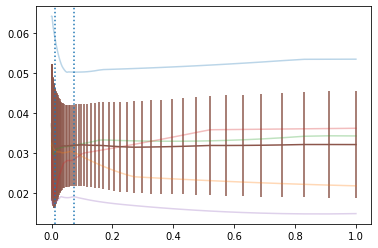

In [38]:
import matplotlib.pyplot as plt

std = np.std(clf.mse_path_, axis=1)
plt.plot(clf.alphas_, clf.mse_path_, alpha=.3)
plt.errorbar(clf.alphas_, clf.mse_path_.mean(axis=1), yerr=std)

best_idx = np.argmin(clf.mse_path_.mean(axis=1))
plt.axvline(clf.alphas_[best_idx], linestyle=':')

idx_sparse = np.argmin(std)
plt.axvline(clf.alphas_[idx_sparse], linestyle=':')

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path

X = data.values[:, 1:]
X_dash = StandardScaler().fit_transform(X)
la_alpha, coefs, _ = lasso_path(X_dash, y, alphas=np.logspace(-4, 0, 100))

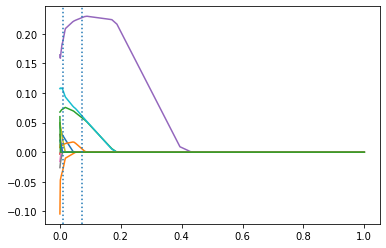

In [61]:
plt.plot(la_alpha, coefs.T)
plt.axvline(reg.alpha_, linestyle=':')
plt.axvline(clf.alphas_[idx_sparse], linestyle=':')

In [66]:
predictorNames = np.array(['wheel-base' ,'length' ,'width' ,'height', 'curb-weight' ,'engine-size', 'bore',
                  'stroke' ,'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'])

idx = [i for i, beta in enumerate(reg.coef_[1:]) if beta != 0]
print(predictorNames[idx].shape)
predictorNames[idx]

(9,)


array(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg'],
      dtype='<U17')

In [67]:
predictorNames[[i for i, beta in enumerate(coefs[:, idx_sparse]) if beta != 0]]

array(['length', 'width', 'curb-weight', 'horsepower'], dtype='<U17')